Enter the stock ticker symbol (e.g., AAPL): AAPL
Enter the start date (YYYY-MM-DD): 2023-05-02
Enter the end date (YYYY-MM-DD): 2024-06-20
Enter the sequence length for LSTM (e.g., 60): 50


[*********************100%%**********************]  1 of 1 completed


Would you like to perform sentiment analysis on a text? (yes/no): yes
Enter the text for sentiment analysis: companys results are going to be anounced today
Sentiment Score: 0.0
Enter the number of epochs for training (e.g., 1): 2
Epoch 1/2
178/178 [==============================] - 8s 23ms/step - loss: 0.0188
Epoch 2/2
178/178 [==============================] - 3s 19ms/step - loss: 0.0131


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved as 'stock_price_lstm_model.h5'
1/1 [==============================] - 1s 835ms/step


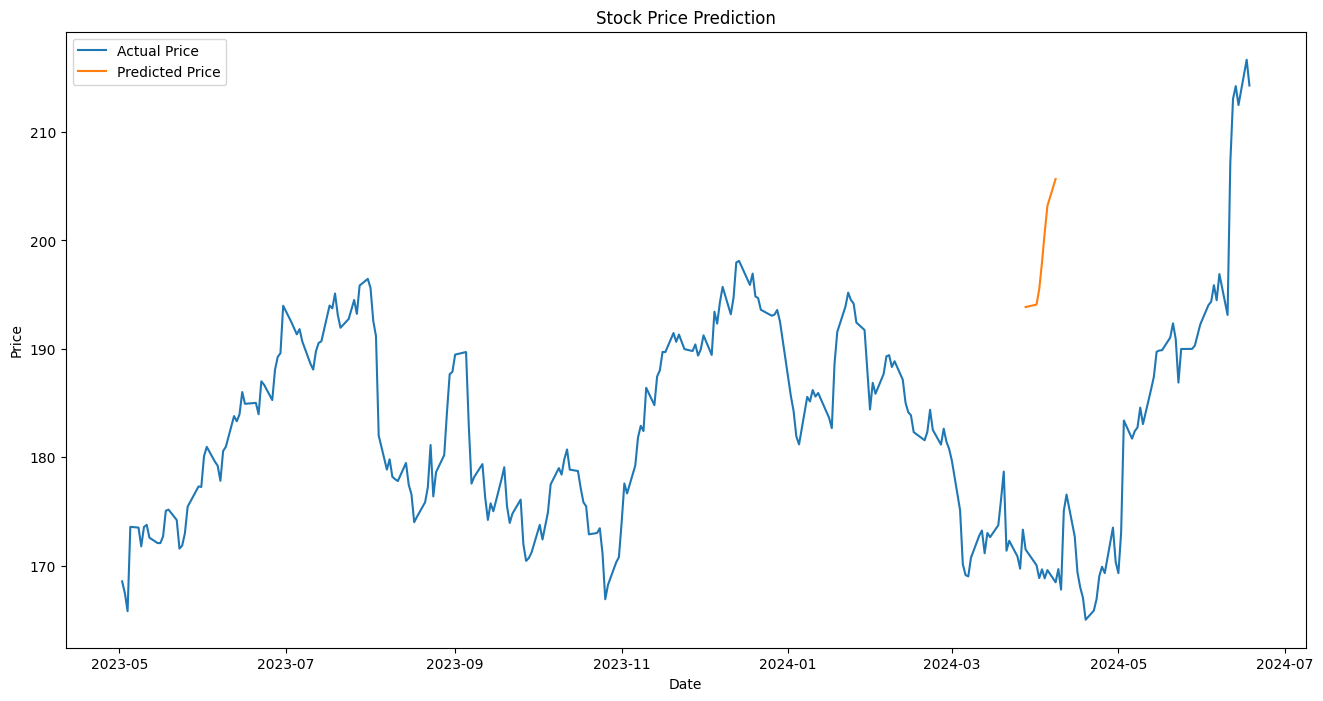

In [ ]:
# Install necessary libraries
!pip install yfinance
!pip install vaderSentiment
!pip install tensorflow

# Import necessary libraries
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Function to download stock data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# User input for stock ticker, start date, end date, and sequence length
ticker = input("Enter the stock ticker symbol (e.g., AAPL): ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
seq_length = int(input("Enter the sequence length for LSTM (e.g., 60): "))

# Download stock data
stock_data = download_stock_data(ticker, start_date, end_date)

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Sentiment Analysis
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']
    return sentiment_score

# User input for sentiment analysis
perform_sentiment_analysis = input("Would you like to perform sentiment analysis on a text? (yes/no): ").lower()
if perform_sentiment_analysis == 'yes':
    user_text = input("Enter the text for sentiment analysis: ")
    sentiment_score = get_sentiment_score(user_text)
    print(f'Sentiment Score: {sentiment_score}')

# Feature Engineering
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

x_train = create_sequences(train_data, seq_length)
x_test = create_sequences(test_data, seq_length)

y_train = train_data[seq_length:]
y_test = test_data[seq_length:]

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Building the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = int(input("Enter the number of epochs for training (e.g., 1): "))
model.fit(x_train, y_train, batch_size=1, epochs=epochs)

# Save the model
model.save('stock_price_lstm_model.h5')
print("Model saved as 'stock_price_lstm_model.h5'")

# Load the model (if needed)
# model = tf.keras.models.load_model('stock_price_lstm_model.h5')

# Prediction and Visualization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(16,8))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Price')
plt.plot(stock_data.index[len(train_data):len(train_data) + len(predictions)], predictions, label='Predicted Price')
plt.title('Stock Price Prediction',ticker)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Enter the stock ticker symbol (e.g., AAPL): AAPL
Enter the start date (YYYY-MM-DD): 2020-05-23
Enter the end date (YYYY-MM-DD): 2024-06-20
Enter the sequence length for LSTM (e.g., 60): 5
Enter the number of days to predict in the future: 5


[*********************100%%**********************]  1 of 1 completed


Would you like to perform sentiment analysis on a text? (yes/no): no
Enter the number of epochs for training (e.g., 1): 5
Epoch 1/5
814/814 [==============================] - 9s 6ms/step - loss: 0.0084
Epoch 2/5
814/814 [==============================] - 6s 7ms/step - loss: 0.0026
Epoch 3/5
814/814 [==============================] - 5s 6ms/step - loss: 0.0019
Epoch 4/5
814/814 [==============================] - 5s 6ms/step - loss: 0.0019
Epoch 5/5
814/814 [==============================] - 7s 9ms/step - loss: 0.0019
Model saved as 'stock_price_lstm_model.h5'


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 29ms/step


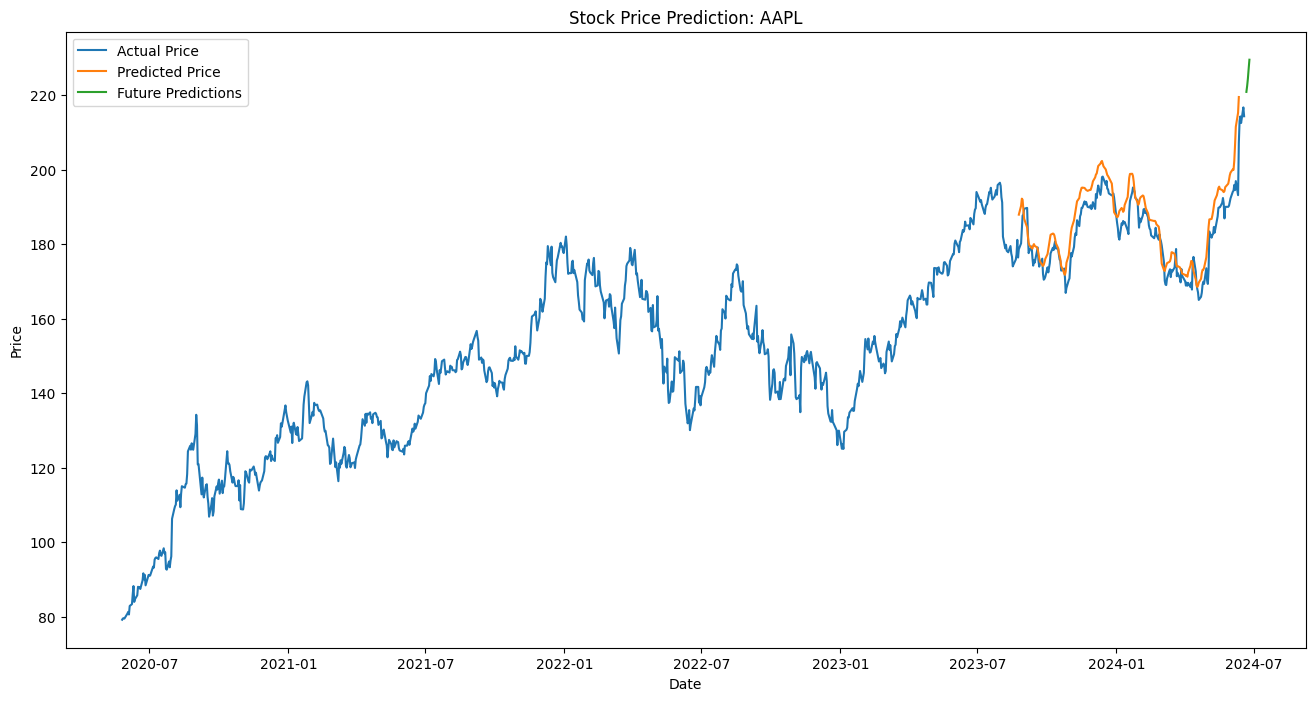

In [2]:
# Install necessary libraries
!pip install yfinance vaderSentiment tensorflow

# Import necessary libraries
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
from sklearn.preprocessing import MinMaxScaler
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
import matplotlib.pyplot as plt

# Function to download stock data
def download_stock_data(ticker, start_date, end_date):
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    return stock_data

# User input for stock ticker, start date, end date, sequence length, and prediction days
ticker = input("Enter the stock ticker symbol (e.g., AAPL): ")
start_date = input("Enter the start date (YYYY-MM-DD): ")
end_date = input("Enter the end date (YYYY-MM-DD): ")
seq_length = int(input("Enter the sequence length for LSTM (e.g., 60): "))
future_days = int(input("Enter the number of days to predict in the future: "))

# Download stock data
stock_data = download_stock_data(ticker, start_date, end_date)

# Data Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data['Close'].values.reshape(-1, 1))

train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]

# Sentiment Analysis
def get_sentiment_score(text):
    analyzer = SentimentIntensityAnalyzer()
    sentiment_score = analyzer.polarity_scores(text)['compound']
    return sentiment_score

# User input for sentiment analysis
perform_sentiment_analysis = input("Would you like to perform sentiment analysis on a text? (yes/no): ").lower()
if perform_sentiment_analysis == 'yes':
    user_text = input("Enter the text for sentiment analysis: ")
    sentiment_score = get_sentiment_score(user_text)
    print(f'Sentiment Score: {sentiment_score}')

# Feature Engineering
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i + seq_length])
    return np.array(sequences)

x_train = create_sequences(train_data, seq_length)
x_test = create_sequences(test_data, seq_length)

y_train = train_data[seq_length:]
y_test = test_data[seq_length:]

# Reshape the data for LSTM
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

# Building the LSTM Model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    Dropout(0.2),
    LSTM(50, return_sequences=False),
    Dropout(0.2),
    Dense(25),
    Dense(1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
epochs = int(input("Enter the number of epochs for training (e.g., 1): "))
model.fit(x_train, y_train, batch_size=1, epochs=epochs)

# Save the model
model.save('stock_price_lstm_model.h5')
print("Model saved as 'stock_price_lstm_model.h5'")

# Load the model (if needed)
# model = tf.keras.models.load_model('stock_price_lstm_model.h5')

# Prediction and Visualization
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

plt.figure(figsize=(16,8))
plt.plot(stock_data.index, stock_data['Close'], label='Actual Price')
plt.plot(stock_data.index[len(train_data):len(train_data) + len(predictions)], predictions, label='Predicted Price')

# Predict future prices
last_sequence = scaled_data[-seq_length:]
future_predictions = []

for _ in range(future_days):
    future_pred = model.predict(last_sequence.reshape(1, seq_length, 1))
    future_predictions.append(future_pred[0, 0])
    last_sequence = np.append(last_sequence[1:], future_pred, axis=0)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Generate future dates
last_date = datetime.strptime(end_date, '%Y-%m-%d')
future_dates = [last_date + timedelta(days=i) for i in range(1, future_days + 1)]

plt.plot(future_dates, future_predictions, label='Future Predictions')
plt.title(f'Stock Price Prediction: {ticker}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


libraries and modules